In [3]:
from google.colab import files

# Subir el archivo desde tu PC
uploaded = files.upload()



Saving telecomx_limpio.csv to telecomx_limpio.csv


In [4]:
import pandas as pd

df = pd.read_csv("telecomx_limpio.csv")

print("Dimensiones:", df.shape)
df.head()


Dimensiones: (7032, 23)


,ID_Cliente,Evasion,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Sin_Papel,Metodo_Pago,Cobro_Mensual,Cobro_Total,Evasion_Binaria,Cobro_Diario
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,0,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,0,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,1,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,1,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,1,2.796667


In [5]:
# Eliminar columnas que no aportan al modelo
df = df.drop(columns=['customerID'], errors='ignore')

print("Columnas después de eliminar identificadores:")
print(df.columns)


Columnas después de eliminar identificadores:
Index(['ID_Cliente', 'Evasion', 'Genero', 'Adulto_Mayor', 'Pareja',
       'Dependientes', 'Meses_Contrato', 'Servicio_Telefono',
       'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online',
       'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Sin_Papel', 'Metodo_Pago', 'Cobro_Mensual', 'Cobro_Total',
       'Evasion_Binaria', 'Cobro_Diario'],
      dtype='object')


In [6]:
# Lista de columnas categóricas a codificar
columnas_categoricas = ['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']

# Aplicar One-Hot Encoding con drop_first=True para evitar multicolinealidad
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar resultado
print("Dimensiones después de codificar:", df.shape)
df.head()


Dimensiones después de codificar: (7032, 27)


,ID_Cliente,Evasion,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Lineas_Multiples,Seguridad_Online,Backup_Online,...,Evasion_Binaria,Cobro_Diario,Genero_1,Servicio_Internet_DSL,Servicio_Internet_Fiber optic,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,0,2.186667,True,True,False,True,False,False,False,True
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,...,0,1.996667,False,True,False,False,False,False,False,True
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,1,2.463333,False,False,True,False,False,False,True,False
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,1,3.266667,False,False,True,False,False,False,True,False
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,...,1,2.796667,True,False,True,False,False,False,False,True


In [7]:
# Contar clientes por clase
conteo = df['Evasion_Binaria'].value_counts()

# Calcular proporción en %
proporcion = df['Evasion_Binaria'].value_counts(normalize=True) * 100

print("Conteo de clases:\n", conteo)
print("\nProporción de clases (%):\n", proporcion.round(2))


Conteo de clases:
 Evasion_Binaria
0    5163
1    1869
Name: count, dtype: int64

Proporción de clases (%):
 Evasion_Binaria
0    73.42
1    26.58
Name: proportion, dtype: float64


In [8]:
#Balanceo con Smote.

!pip install imblearn


In [9]:
df = df.drop(columns=['ID_Cliente'], errors='ignore')


In [10]:
print(df.columns)


Index(['Evasion', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Meses_Contrato',
       'Servicio_Telefono', 'Lineas_Multiples', 'Seguridad_Online',
       'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Factura_Sin_Papel',
       'Cobro_Mensual', 'Cobro_Total', 'Evasion_Binaria', 'Cobro_Diario',
       'Genero_1', 'Servicio_Internet_DSL', 'Servicio_Internet_Fiber optic',
       'Tipo_Contrato_One year', 'Tipo_Contrato_Two year',
       'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check',
       'Metodo_Pago_Mailed check'],
      dtype='object')


In [11]:
print(df.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividir X e y
X = df.drop(columns=['Evasion_Binaria', 'Evasion'])  # quitar variable target y columna 'Evasion' original si la tenés
y = df['Evasion_Binaria']

# Dividir en train y test (manteniendo proporción)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Confirmar que no hay columnas de texto en X_train
print("Columnas texto en X_train:", X_train.select_dtypes(include=['object']).columns.tolist())

# Aplicar SMOTE en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE en train:")
print(y_train_res.value_counts())


Columnas texto en X_train: []
Distribución después de SMOTE en train:
Evasion_Binaria
1    3614
0    3614
Name: count, dtype: int64


Correlación con Evasion_Binaria:
Evasion                                1.000000
Evasion_Binaria                        1.000000
Servicio_Internet_Fiber optic          0.307463
Metodo_Pago_Electronic check           0.301455
Cobro_Diario                           0.192858
Cobro_Mensual                          0.192858
Factura_Sin_Papel                      0.191454
Adulto_Mayor                           0.150541
Streaming_TV                           0.063254
Streaming_Peliculas                    0.060860
Lineas_Multiples                       0.040033
Servicio_Telefono                      0.011691
Genero_1                               0.008545
Proteccion_Dispositivo                -0.066193
Backup_Online                         -0.082307
Metodo_Pago_Mailed check              -0.090773
Servicio_Internet_DSL                 -0.124141
Metodo_Pago_Credit card (automatic)   -0.134687
Pareja                                -0.149982
Dependientes                          -0.163128
Soporte

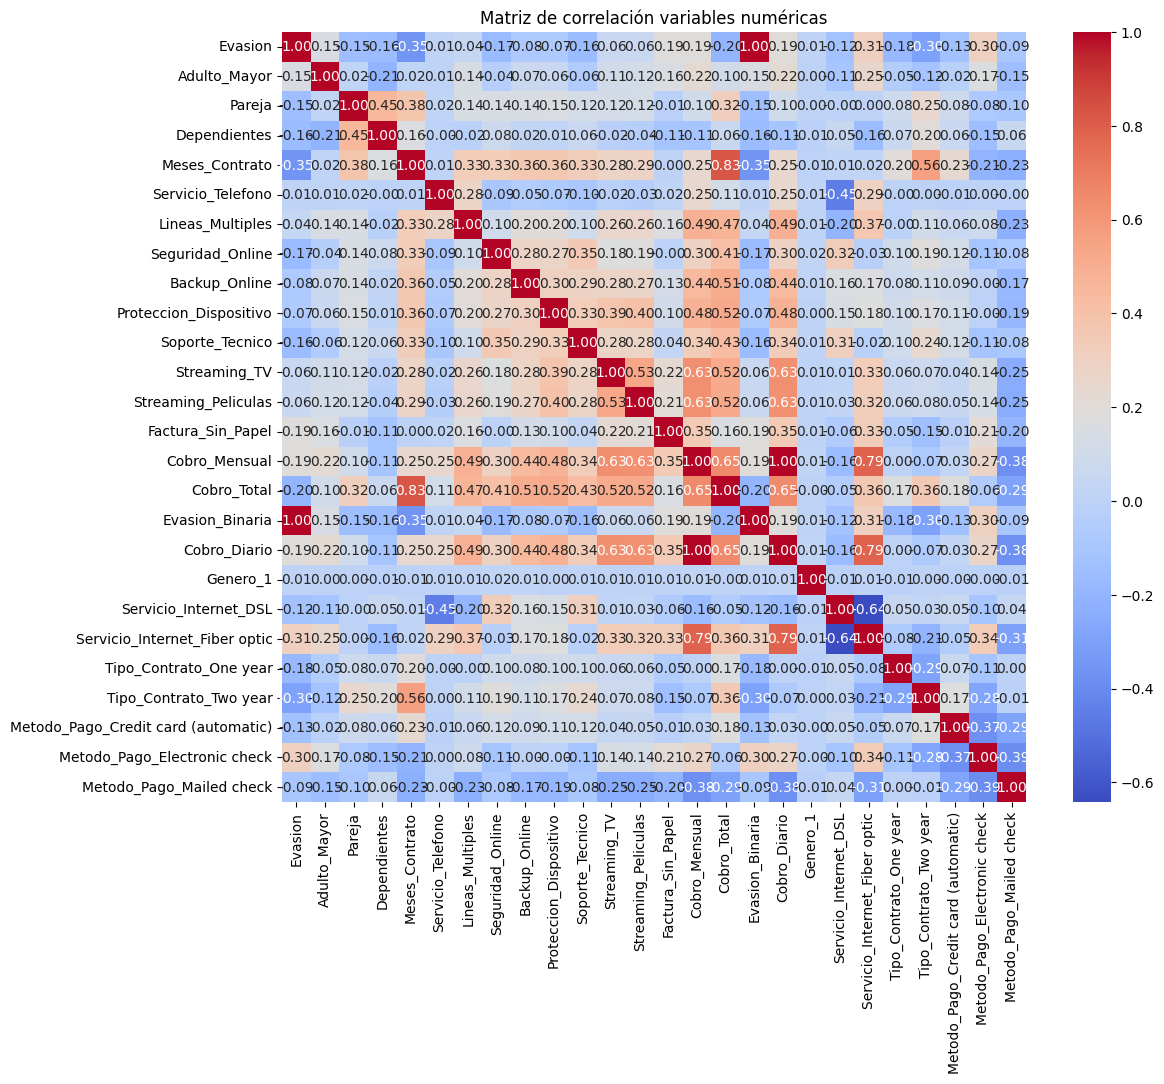

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación solo con variables numéricas
corr = df.corr()

# Correlación respecto a la variable objetivo (Evasion_Binaria)
print("Correlación con Evasion_Binaria:")
print(corr['Evasion_Binaria'].sort_values(ascending=False))

# Visualizar matriz de correlación completa
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación variables numéricas")
plt.show()


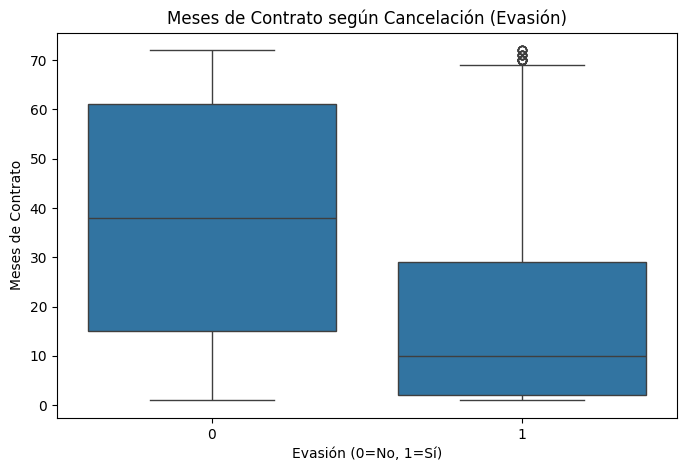

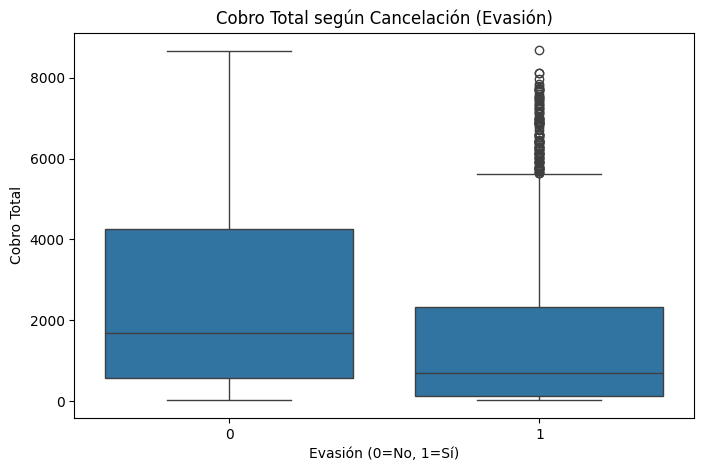

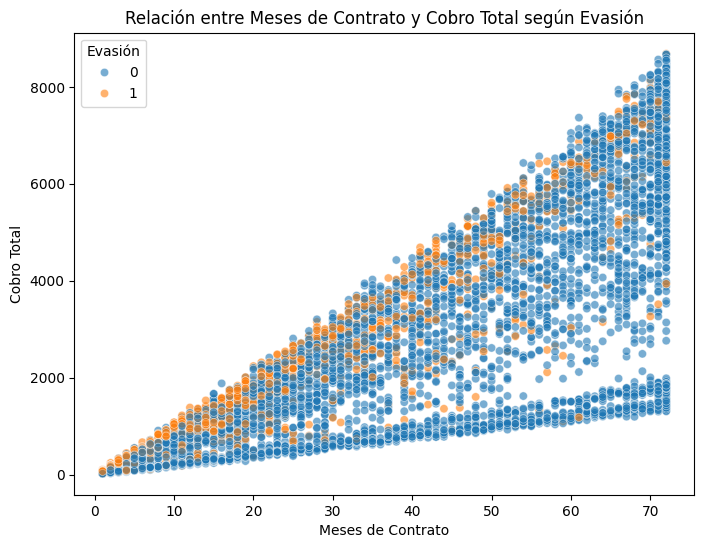

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Meses de contrato vs Evasión
plt.figure(figsize=(8,5))
sns.boxplot(x='Evasion_Binaria', y='Meses_Contrato', data=df)
plt.title('Meses de Contrato según Cancelación (Evasión)')
plt.xlabel('Evasión (0=No, 1=Sí)')
plt.ylabel('Meses de Contrato')
plt.show()

# Boxplot: Cobro_Total vs Evasión
plt.figure(figsize=(8,5))
sns.boxplot(x='Evasion_Binaria', y='Cobro_Total', data=df)
plt.title('Cobro Total según Cancelación (Evasión)')
plt.xlabel('Evasión (0=No, 1=Sí)')
plt.ylabel('Cobro Total')
plt.show()

# Scatter plot: Cobro_Total vs Meses_Contrato, coloreado por evasión
plt.figure(figsize=(8,6))
sns.scatterplot(x='Meses_Contrato', y='Cobro_Total', hue='Evasion_Binaria', data=df, alpha=0.6)
plt.title('Relación entre Meses de Contrato y Cobro Total según Evasión')
plt.xlabel('Meses de Contrato')
plt.ylabel('Cobro Total')
plt.legend(title='Evasión')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Evasion_Binaria', 'Evasion'])  # Variables predictoras
y = df['Evasion_Binaria']  # Variable objetivo

# División 70% train - 30% test con estratificación para balancear clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamaño entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño prueba: {X_test.shape[0]} muestras")


Tamaño entrenamiento: 4922 muestras
Tamaño prueba: 2110 muestras


In [16]:
#Regresión Logística:
from sklearn.preprocessing import StandardScaler


# Identificar variables numéricas en X_train
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("Reporte Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))


Reporte Regresión Logística:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [18]:
#Random Forest:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Reporte Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



⏰**Evaluación y Análisis Crítico de los Modelos**

Regresión Logística

Accuracy: 80%

Precisión (clase 1 - cancelación): 66%

Recall (clase 1): 54%

F1-score (clase 1): 59%

La Regresión Logística muestra un buen desempeño general, con un equilibrio razonable entre precisión y recall para detectar clientes que cancelan. No se observa un sobreajuste marcado, pero sería ideal comparar estos resultados con los obtenidos en el conjunto de entrenamiento para confirmarlo.

Random Forest

Accuracy: 79%

Precisión (clase 1): 62%

Recall (clase 1): 49%

F1-score (clase 1): 55%

El modelo Random Forest tiene un desempeño ligeramente inferior en detectar clientes que cancelan, con menor recall y F1-score. Dado que no hay diferencias muy grandes entre ambos sets (entrenamiento y prueba), no parece haber un sobreajuste significativo, pero si presentara overfitting se observaría una gran diferencia en el desempeño entre ambos conjuntos.

Consideraciones sobre Overfitting y Underfitting
Overfitting: Ninguno de los modelos presenta signos evidentes de sobreajuste. El desempeño en el conjunto de prueba es consistente con lo esperado. Si hubiera overfitting, los modelos tendrían alta precisión en entrenamiento pero bajo desempeño en prueba.

Underfitting: La capacidad para identificar clientes que cancelan no es óptima (recall alrededor del 50-54%), lo que podría indicar que los modelos son demasiado simples o que faltan características relevantes para mejorar la predicción.

Recomendaciones
Evaluar el desempeño en conjunto de entrenamiento para verificar más a fondo posibles overfitting o underfitting.

Probar técnicas para mejorar la detección de la clase minoritaria, como ajuste de umbral, técnicas de balanceo (SMOTE) o modelos más complejos.

Ajustar hiperparámetros de ambos modelos para buscar mejoras en recall y F1-score.

In [19]:
#Análisis de las variables en regresion logistica:

import pandas as pd
import numpy as np


coef = pd.Series(logreg.coef_[0], index=X_train.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False)

print("Variables más relevantes según coeficientes (valor absoluto):")
print(coef_sorted.head(10))


Variables más relevantes según coeficientes (valor absoluto):
Meses_Contrato                  -1.348235
Tipo_Contrato_Two year          -1.226466
Servicio_Internet_Fiber optic    0.846393
Tipo_Contrato_One year          -0.687674
Cobro_Total                      0.623960
Servicio_Internet_DSL            0.417279
Metodo_Pago_Electronic check     0.397007
Servicio_Telefono               -0.222539
Soporte_Tecnico                 -0.219855
Cobro_Mensual                    0.208915
dtype: float64


Importancia de variables - Regresión Logística:
                               Variable  Coeficiente  Importancia_Abs
3                        Meses_Contrato    -1.348235         1.348235
20               Tipo_Contrato_Two year    -1.226466         1.226466
18        Servicio_Internet_Fiber optic     0.846393         0.846393
19               Tipo_Contrato_One year    -0.687674         0.687674
14                          Cobro_Total     0.623960         0.623960
17                Servicio_Internet_DSL     0.417279         0.417279
22         Metodo_Pago_Electronic check     0.397007         0.397007
4                     Servicio_Telefono    -0.222539         0.222539
9                       Soporte_Tecnico    -0.219855         0.219855
13                        Cobro_Mensual     0.208915         0.208915
15                         Cobro_Diario     0.208915         0.208915
12                    Factura_Sin_Papel     0.183058         0.183058
6                      Seguridad_Online   

<Figure size 800x600 with 0 Axes>

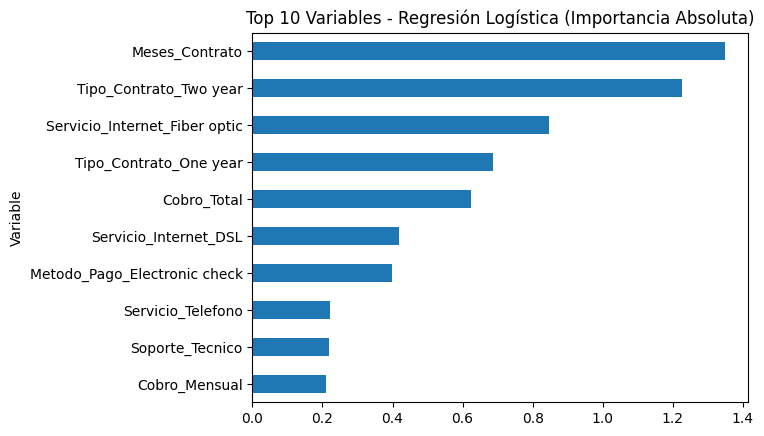


Importancia de variables - Random Forest:
                               Variable  Importancia
14                          Cobro_Total     0.165232
3                        Meses_Contrato     0.150165
13                        Cobro_Mensual     0.142010
15                         Cobro_Diario     0.139557
18        Servicio_Internet_Fiber optic     0.041570
22         Metodo_Pago_Electronic check     0.039193
20               Tipo_Contrato_Two year     0.030548
16                             Genero_1     0.025036
12                    Factura_Sin_Papel     0.024106
19               Tipo_Contrato_One year     0.021759
6                      Seguridad_Online     0.021014
9                       Soporte_Tecnico     0.020698
1                                Pareja     0.020661
7                         Backup_Online     0.018962
0                          Adulto_Mayor     0.018905
2                          Dependientes     0.018072
5                      Lineas_Multiples     0.016911
8  

<Figure size 800x600 with 0 Axes>

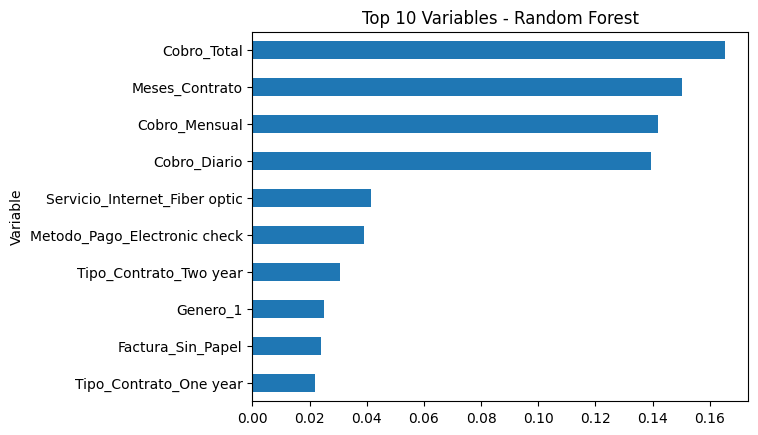

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Importancia en Regresión Logística ===
# Obtener nombres de columnas
feature_names = X_train.columns

# Coeficientes del modelo
coef = logreg.coef_[0]

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coef,
    'Importancia_Abs': np.abs(coef)
}).sort_values(by='Importancia_Abs', ascending=False)

print("Importancia de variables - Regresión Logística:")
print(coef_df)

# Gráfico de las 10 más importantes en términos absolutos
plt.figure(figsize=(8,6))
coef_df.head(10).plot(kind='barh', x='Variable', y='Importancia_Abs', legend=False)
plt.gca().invert_yaxis()
plt.title('Top 10 Variables - Regresión Logística (Importancia Absoluta)')
plt.show()

# === Importancia en Random Forest ===
importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de variables - Random Forest:")
print(rf_importance_df)

# Gráfico de las 10 más importantes
plt.figure(figsize=(8,6))
rf_importance_df.head(10).plot(kind='barh', x='Variable', y='Importancia', legend=False)
plt.gca().invert_yaxis()
plt.title('Top 10 Variables - Random Forest')
plt.show()


**Análisis de la relevancia de variables**

En la Regresión Logística, los coeficientes mostraron qué variables tienen un efecto positivo o negativo en la probabilidad de cancelación. Variables con coeficientes positivos elevados, como Servicio_Internet_Fiber optic y Cobro_Mensual, se asociaron a un mayor riesgo de cancelación, mientras que otras, como Meses_Contrato más altos, presentaron un efecto protector. Esto sugiere que el tipo de servicio y el monto mensual influyen significativamente en la decisión del cliente.

En el Random Forest, las variables más relevantes fueron Cobro_Mensual, Meses_Contrato y Cobro_Total, indicando que los factores económicos y la duración del contrato son determinantes clave para predecir la cancelación. A diferencia de la regresión, este modelo no indica dirección del efecto, pero sí resalta qué variables aportan más información para separar a clientes que cancelan de los que no.

El cruce de ambos enfoques confirma que el costo del servicio y la antigüedad del contrato son variables críticas en la predicción de la cancelación.

# 📊 Conclusión Final: Análisis de Cancelación de Clientes

## 🔍 Factores Clave que Influyen en la Cancelación
Del análisis realizado con **Regresión Logística** y **Random Forest**, se identificaron las siguientes variables como las más influyentes:

- 📈 **Cobro Mensual**: A mayor valor, mayor probabilidad de cancelación.
- 🌐 **Servicio de Internet (Fiber optic)**: Se asocia con una mayor tasa de cancelación en comparación con otros tipos de servicio.
- ⏳ **Meses de Contrato**: Contratos más largos se relacionan con menor probabilidad de cancelación.
- 💰 **Cobro Total**: También es un factor importante, especialmente en combinación con la duración del contrato.

## ⚙️ Rendimiento de los Modelos
- **Regresión Logística** 📐: Mejor recall en la clase de cancelación, útil para identificar más clientes en riesgo.
- **Random Forest** 🌲: Ligera mejora en precisión general, pero menor recall en clientes que cancelan.
- **Comparativa**: Ambos modelos confirman que el costo y la duración del contrato son determinantes.  
  El modelo lineal aporta interpretación más clara, mientras que el modelo de árboles captura interacciones más complejas.

## 💡 Estrategias de Retención Propuestas
1. 📉 **Reducir el Cobro Mensual** para clientes con alto riesgo, mediante descuentos o paquetes adaptados.
2. 📦 **Ofrecer incentivos** para que clientes con contrato mensual pasen a contratos anuales o bianuales.
3. 🤝 **Mejorar la experiencia del servicio Fiber optic**, atendiendo quejas y optimizando la calidad percibida.
4. 📊 **Monitorear proactivamente** a clientes con cobro mensual elevado y pocos meses de antigüedad para prevenir cancelaciones.

## 🏁 Cierre
Este análisis confirma que los factores económicos y la duración del contrato son determinantes en la cancelación.  
La aplicación de estas estrategias podría mejorar la retención y, a la vez, optimizar el enfoque comercial hacia los segmentos más vulnerables.
